In [163]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


LOAN DATASET TRAIN AND TEST DATA

In [3]:
url = "https://raw.githubusercontent.com/ParthS007/Loan-Approval-Prediction/master/train.csv"
x_train = pd.read_csv(url)

In [4]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
url1="https://github.com/ParthS007/Loan-Approval-Prediction/blob/master/test.csv"
y_test = pd.read_csv(url)

In [6]:
y_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


UNDERSTANDING THE FEATURES OF THE DATSET

In [7]:
x_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Find the unique values and their freq of variable in property area

In [8]:
x_train['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Understanding Distribution of Numerical Variables
ApplicantIncome
LoanAmount

<Axes: >

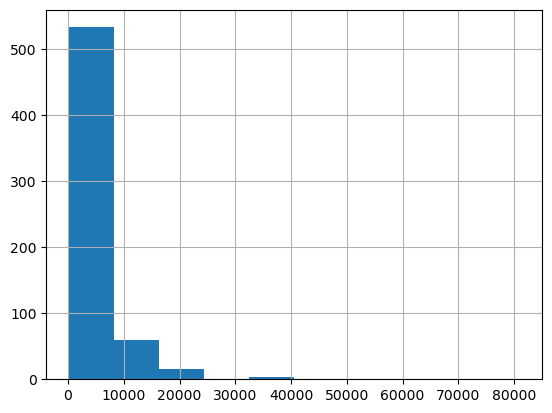

In [9]:
x_train['ApplicantIncome'].hist()

<Axes: >

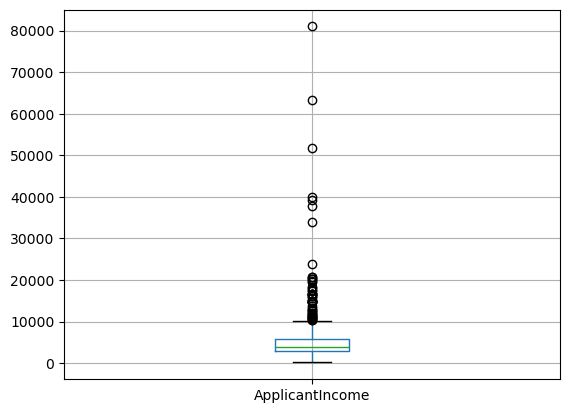

In [10]:
x_train.boxplot(column='ApplicantIncome')

The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

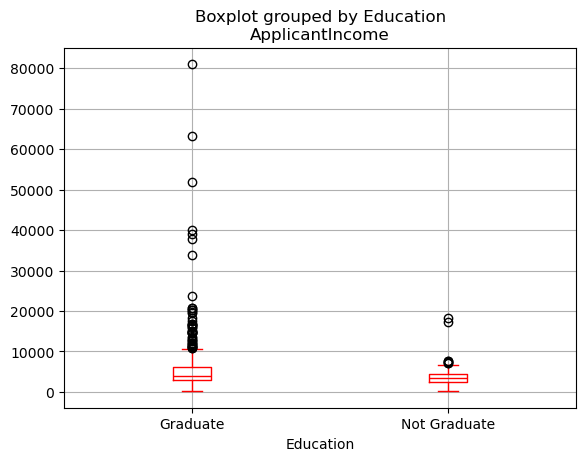

In [12]:
x_train.boxplot(column='ApplicantIncome', by = 'Education',color='red')

We can observe there are a higher number of graduates with very high incomes, which are appearing to be the outliers

<Axes: >

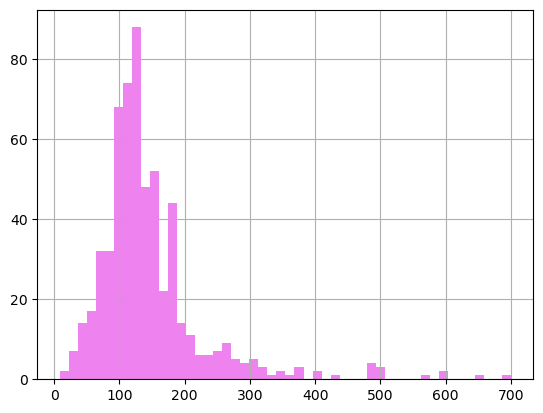

In [13]:
x_train['LoanAmount'].hist(bins=50,color='violet')

<Axes: title={'center': 'LoanAmount'}, xlabel='Gender'>

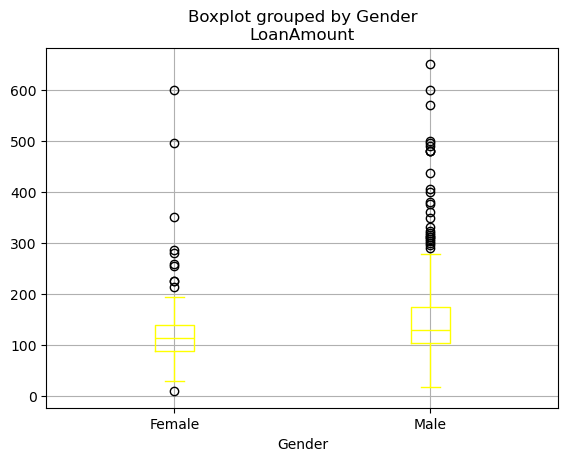

In [14]:
x_train.boxplot(column='LoanAmount', by = 'Gender',color='yellow')

LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

UNDERSTANDING DISTRIBUTION OF CATEGORICAL VARIABLES

In [15]:
loan_approval = x_train['Loan_Status'].value_counts()['Y']
loan_approval

np.int64(422)

In [16]:
cross_table = pd.crosstab(x_train ['Credit_History'], x_train ['Loan_Status'], margins=True)

Function to output percentage row wise in a cross table

In [17]:
def percentageConvert(ser):
    return ser/float(ser.iloc[-1])


In [18]:
loan_approval_percentages = cross_table.apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = loan_approval_percentages.loc[1.0, 'Y']
loan_approval_with_Credit_1

np.float64(0.7957894736842105)

In [20]:
x_train['Self_Employed'].fillna('No',inplace=True)

In [21]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


OUTLIERS OF LOAN AMOUNT AND APPLICANT INCOME

<Axes: >

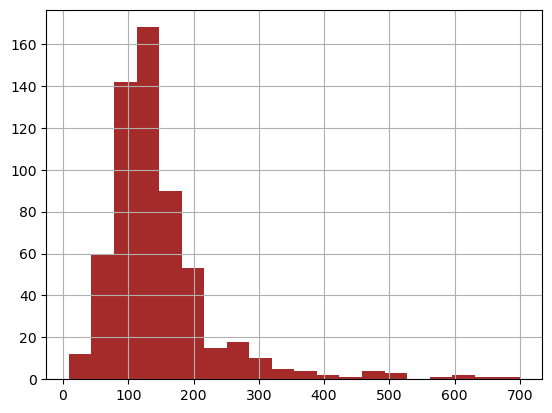

In [22]:
x_train['TotalIncome'] = x_train['ApplicantIncome'] + x_train['CoapplicantIncome']
x_train['LoanAmount'].hist(bins=20,color='brown')

<Axes: >

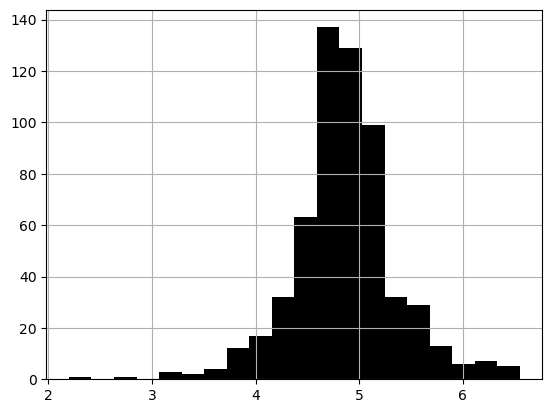

In [23]:
x_train['LoanAmount_log'] = np.log(x_train['LoanAmount'])
x_train['LoanAmount_log'].hist(bins=20,color='black')

DATA PREPARATION FOR MODEL BUILDING

sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset

In [25]:
x_train['Gender'].fillna(x_train['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
x_train['Married'].fillna(x_train['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
x_train['Dependents'].fillna(x_train['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
x_train['Credit_History'].fillna(x_train['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    x_train[var]=le.fit_transform(x_train[var].astype('str'))
x_train.dtypes

C:\Users\Niraj\AppData\Local\Temp\ipykernel_19232\2017755892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Gender'].fillna(x_train['Gender'].mode()[0],inplace=True)
C:\Users\Niraj\AppData\Local\Temp\ipykernel_19232\2017755892.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

GENERIC CLASSIFICATION FUNCTION

In [133]:
def classification_model(model, data, predictors, outcome):
    # Reset the index to ensure it's a continuous sequence from 0 to n-1.
    # This prevents IndexErrors during cross-validation.
    data = data.reset_index(drop=True)

    # Fit the model on the full dataset
    model.fit(data[predictors], data[outcome])

    # Make predictions on the training set
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    error = []

    # The split method now returns indices directly
    for train_index, test_index in kf.split(data):
        # Filter training and testing data using the indices
        train_predictors = data[predictors].iloc[train_index]
        train_target = data[outcome].iloc[train_index]

        # Training the algorithm using the predictors and target
        model.fit(train_predictors, train_target)

        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test_index], data[outcome].iloc[test_index]))

    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    # Fit the model one last time on the full data for external use
    model.fit(data[predictors], data[outcome])

Create label encoders for categorical features

MODEL BUILDING 

Identify categorical and continuous variables

LOGISTIC REGRESSION MODEL

The chances of getting a loan will be higher for:

Applicants having a credit history (we observed this in exploration.)
Applicants with higher applicant and co-applicant incomes
Applicants with higher education level
Properties in urban areas with high growth perspectives
So let’s make our model with ‘Credit_History’, 'Education' & 'Gender'

Train the model using the training sets

Reverse encoding for predicted outcome

In [101]:
data = {'Type': ['Train', 'Train', 'Train', 'Train', 'Train'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Credit_History': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
        'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N']}
fullData = pd.DataFrame(data)

In [153]:
cat_cols = ['Gender', 'Credit_History', 'Education', 'Loan_Status']
target_col = 'Loan_Status'
for col in cat_cols:
    le = LabelEncoder()
    fullData[col] = le.fit_transform(fullData[col].astype('str'))



In [154]:
loan_status_encoder = LabelEncoder()
fullData[target_col] = loan_status_encoder.fit_transform(fullData[target_col].astype('str'))

In [155]:
X = fullData[cat_cols]
y = fullData[target_col]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [158]:
predicted = model.predict(X_test)

In [ ]:
#y_test['Loan_Status']=predicted

In [119]:
outcome_var = 'Loan_Status'

In [120]:
predictors_Logistic=['Credit_History','Education','Gender']

In [159]:
classification_model(model, fullData,predictors_Logistic,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 40.000%


In [160]:
cm = confusion_matrix(y_test, predicted)

In [149]:
encoders = {col: LabelEncoder() for col in cat_cols}

In [161]:
loan_status_labels = loan_status_encoder.classes_

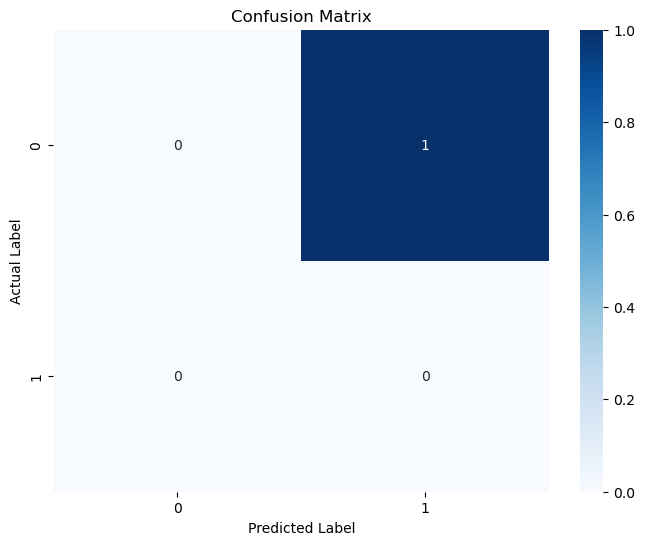

Confusion Matrix:
[[0 1]
 [0 0]]


In [164]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=loan_status_labels,
    yticklabels=loan_status_labels
)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("Confusion Matrix:")
print(cm)